In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("CUDA version:", tf.test.is_built_with_cuda())

TensorFlow version: 2.6.0
CUDA version: True


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [4]:
!pip install pandas==1.3.2
!pip install numpy==1.19.5
!pip install matplotlib==3.4.2
!pip install keras==2.6.0
!pip install pillow==8.3.1
!pip install scikit-learn==0.24.2



  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.


  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.6.0 which is incompatible.


In [5]:
!pip install numpy==1.19.5

  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.6.0 which is incompatible.
tensorflow-intel 2.11.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.


In [6]:
!pip install matplotlib==3.4.2

In [7]:
!pip install keras==2.6.0

In [8]:
!pip install scikit-learn==0.24.2

In [9]:
!pip install keras==2.6.0 tensorflow==2.6.o





ERROR: Could not find a version that satisfies the requirement tensorflow==2.6.o (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow==2.6.o


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
#import tensorflow_hub as hub
from matplotlib import pyplot as plt
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pickle

## making labels and creating filenames in array

In [4]:
labels_csv = pd.read_csv("crnAndName.csv")
print(labels_csv.describe())
print(labels_csv.head())

                 CRN       Full Name
count             32              32
unique            32              32
top     NCE075BCT002  AAKRITI DHAKAL
freq               1               1
            CRN          Full Name
0  NCE075BCT002     AAKRITI DHAKAL
1  NCE075BCT003       AASHISH SHAH
2  NCE075BCT004    AAYUSH ADHIKARI
3  NCE075BCT005  ANILA BAJRACHARYA
4  NCE075BCT006       PEMILA LIMBU


In [5]:
# convert labels column to NumPy array
unique_labels=labels_csv['CRN'].to_numpy()
unique_labels

array(['NCE075BCT002', 'NCE075BCT003', 'NCE075BCT004', 'NCE075BCT005',
       'NCE075BCT006', 'NCE075BCT007', 'NCE075BCT008', 'NCE075BCT009',
       'NCE075BCT010', 'NCE075BCT011', 'NCE075BCT012', 'NCE075BCT013',
       'NCE075BCT014', 'NCE075BCT015', 'NCE075BCT016', 'NCE075BCT017',
       'NCE075BCT018', 'NCE075BCT019', 'NCE075BCT020', 'NCE075BCT021',
       'NCE075BCT023', 'NCE075BCT024', 'NCE075BCT025', 'NCE075BCT026',
       'NCE075BCT027', 'NCE075BCT028', 'NCE075BCT029', 'NCE075BCT031',
       'NCE075BCT032', 'NCE075BCT033', 'NCE075BCT034', 'NCE075BCT035'],
      dtype=object)

In [6]:
import os
filedir=["data/"+crn for crn in unique_labels]
filedir[:5]

['data/NCE075BCT002',
 'data/NCE075BCT003',
 'data/NCE075BCT004',
 'data/NCE075BCT005',
 'data/NCE075BCT006']

In [8]:
filenames=[]
labels=[]
for dir in filedir:
    files=os.listdir(dir)
    for file in files:
        if not file.endswith('.ini'):  # check if file extension is not '.ini'
            filetemp=dir+'/'+file
            filenames.append(filetemp)
            labels.append(dir[5:])

In [9]:
#checking files and labels available
print(len(filenames))
len((labels))

20795


20795

In [10]:
#checking labels and file name
print(filenames[:5])
print(labels[:5])

['data/NCE075BCT002/1 (1) - Copy.jpg', 'data/NCE075BCT002/1 (1).jpg', 'data/NCE075BCT002/1 (2) - Copy.jpg', 'data/NCE075BCT002/1 (2).jpg', 'data/NCE075BCT002/1 (3) - Copy.jpg']
['NCE075BCT002', 'NCE075BCT002', 'NCE075BCT002', 'NCE075BCT002', 'NCE075BCT002']


In [11]:
np_labels=np.asarray(labels)
print(np_labels)
type(np_labels)

['NCE075BCT002' 'NCE075BCT002' 'NCE075BCT002' ... 'NCE075BCT035'
 'NCE075BCT035' 'NCE075BCT035']


numpy.ndarray

In [12]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_labels # use comparison operator to create boolean array

NCE075BCT002


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [13]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_labels) for label in labels]
boolean_labels[-2:]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True])]

In [14]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_labels == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

NCE075BCT002
0
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## creating validation list in small data

In [15]:
# Setup X & y variables
X = filenames
y = np_labels

In [16]:
# Set number of images to use for experimenting
NUM_IMAGES = 500 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

500

In [17]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                 random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(16636, 16636, 4159, 4159)

In [18]:
X_train[:5], y_train[:5]

(['data/NCE075BCT007/basanta (3)_B_1.0 - Copy.jpg',
  'data/NCE075BCT021/drishya (15)_B_0.3333333333333333.jpg',
  'data/NCE075BCT008/BIMAL  (7) - Copy.jpg',
  'data/NCE075BCT015/monika (30)_hf_C_0.3333333333333333.jpg',
  'data/NCE075BCT032/subekshya (22)_hf_C_0.6666666666666666.jpg'],
 array(['NCE075BCT007', 'NCE075BCT021', 'NCE075BCT008', 'NCE075BCT015',
        'NCE075BCT032'], dtype='<U12'))

## Preprocessing images (turning images into Tensors)

In [24]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[0]) # read in an image
image.shape

(1058, 796, 3)

In [25]:
#tf.constant convert list into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 796, 3), dtype=uint8, numpy=
array([[[ 33,  57,  69],
        [ 30,  54,  66],
        [ 30,  54,  66],
        ...,
        [ 93,  82,  80],
        [ 94,  83,  79],
        [102,  91,  87]],

       [[ 33,  57,  69],
        [ 31,  55,  67],
        [ 29,  53,  65],
        ...,
        [ 92,  81,  79],
        [ 92,  81,  77],
        [ 92,  81,  77]]], dtype=uint8)>

In [26]:
# Define image size
IMG_SIZE = 160

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

## Creating data batches

In [27]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [28]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
  
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))# filenames                                                 
        data = data.shuffle(buffer_size=facelen(x))
# Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [29]:
# Create training and validation data batches
train_data = create_data_batches(X_train,test_data=True)
val_data = create_data_batches(X_val,test_data=True)

Creating test data batches...
Creating test data batches...


In [30]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None))

## Visualizing data batches

In [31]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis("off")

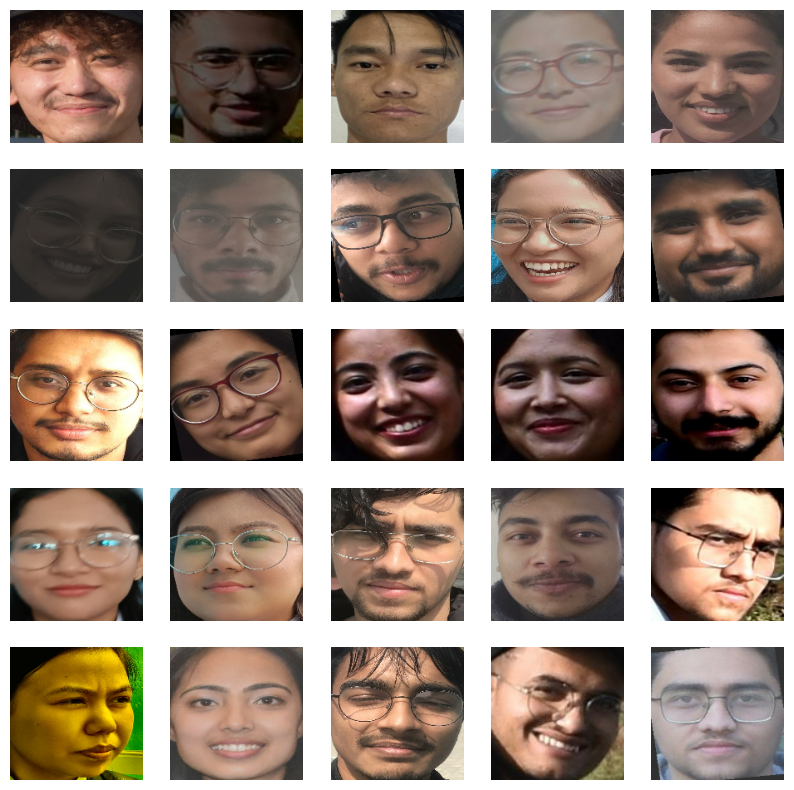

In [32]:
# Visualize training images from the training data batch
train_images = next(train_data.as_numpy_iterator())
show_25_images(train_images)

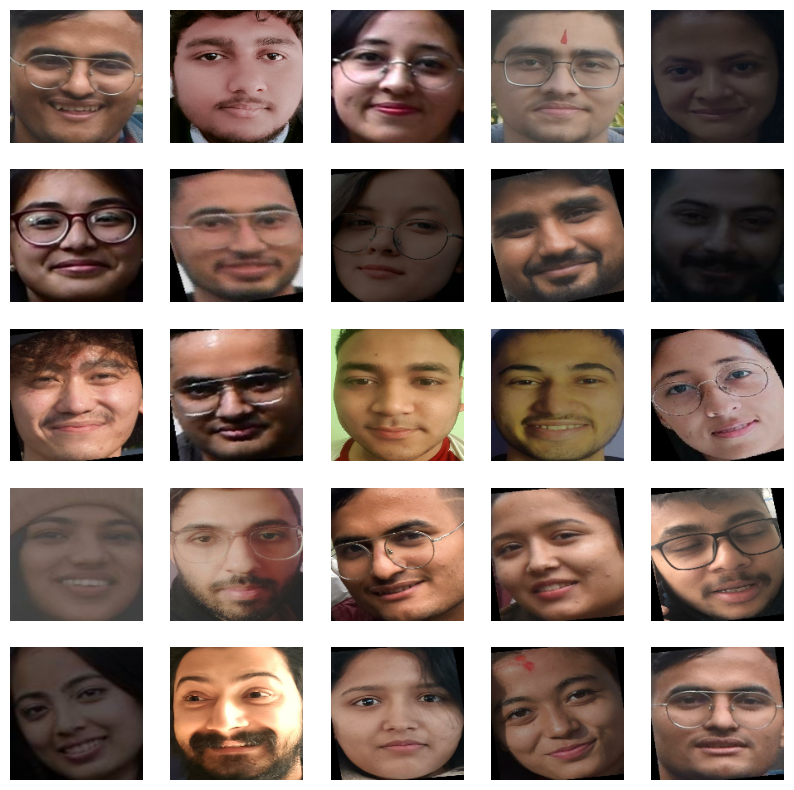

In [33]:
# Visualize validation images from the validation data batch
val_images=next(val_data.as_numpy_iterator())
show_25_images(val_images)

## Building a model

In [34]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

In [35]:
INPUT_SHAPE

[None, 160, 160, 3]

In [36]:
#find embeddings
model = load_model('model/facenet_keras.h5')
X_train_emb = model.predict(train_data)
X_val_emb = model.predict(val_data)

In [37]:
X_train_emb

array([[-0.24682382, -2.5135777 , -0.3730769 , ..., -1.6734236 ,
        -0.70067286, -0.69207877],
       [-1.9448494 , -0.16026503,  0.37209147, ..., -0.9505857 ,
        -0.7579725 ,  0.5088954 ],
       [ 0.42110977, -0.7526268 , -0.96449107, ..., -1.2122446 ,
         0.63867587,  0.09715115],
       ...,
       [-1.6504087 ,  0.2407049 , -0.23683865, ..., -0.53561187,
         0.7991504 , -1.2138454 ],
       [ 0.57394326, -0.9376793 , -1.9358898 , ..., -1.5358282 ,
         0.9929847 , -1.0663536 ],
       [ 0.58688116,  1.4165497 , -0.15373884, ..., -2.2147617 ,
        -0.09525914, -0.08814822]], dtype=float32)

In [38]:
X_val_emb

array([[-1.7711143 ,  0.08165586,  0.18025386, ...,  0.7674068 ,
         0.26617825, -0.3585858 ],
       [ 0.7719791 , -1.0667013 , -0.90975106, ..., -0.36355296,
         0.13249028, -0.308606  ],
       [-0.8575758 , -0.4814971 ,  1.4138684 , ...,  0.95782775,
        -0.00490191, -0.8716626 ],
       ...,
       [ 1.1862911 ,  0.39340532, -0.7788471 , ..., -1.6911495 ,
         1.8746353 , -0.05097628],
       [ 0.28237808, -1.2053322 , -0.87925524, ..., -1.0400652 ,
        -0.00749299,  0.44304553],
       [-0.05396233, -0.3301653 , -0.29012302, ..., -0.92840636,
         0.46962893,  0.48095253]], dtype=float32)

## now svc 

In [39]:
#normalize the embedded data
in_encode = Normalizer(norm='l2')
X_train_emb_nom = in_encode.transform(X_train_emb)
X_val_emb_nom = in_encode.transform(X_val_emb)

In [40]:
X_train_emb_nom,X_train_emb_nom.shape,type(X_train_emb_nom)

(array([[-0.02136941, -0.2176195 , -0.0323001 , ..., -0.14488098,
         -0.06066257, -0.05991851],
        [-0.17384326, -0.01432553,  0.03325995, ..., -0.08496953,
         -0.0677525 ,  0.04548838],
        [ 0.03403223, -0.06082397, -0.07794591, ..., -0.09796826,
          0.05161496,  0.00785133],
        ...,
        [-0.13394716,  0.01953561, -0.01922182, ..., -0.04347026,
          0.06485904, -0.09851568],
        [ 0.04909685, -0.08021193, -0.1656019 , ..., -0.13137941,
          0.08494293, -0.09121912],
        [ 0.04777532,  0.11531486, -0.01251518, ..., -0.18029366,
         -0.00775461, -0.00717575]], dtype=float32),
 (16636, 128),
 numpy.ndarray)

In [41]:
y_train

array(['NCE075BCT007', 'NCE075BCT021', 'NCE075BCT008', ...,
       'NCE075BCT010', 'NCE075BCT003', 'NCE075BCT027'], dtype='<U12')

In [42]:
#define svm classifier model new variable C=CLoseness aaded
model_svc =SVC(kernel='poly',degree=5, probability=True,C=100)
model_svc.fit(X_train_emb_nom,y_train)

SVC(C=100, degree=5, kernel='poly', probability=True)

In [43]:
model_svc.score(X_train_emb_nom,y_train)

1.0

In [44]:
model_svc.score(X_val_emb_nom,y_val)

0.9983169031017072

In [45]:
y_preds=model_svc.predict(X_val_emb_nom)

In [46]:
model_svc.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 5,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [47]:
from sklearn.model_selection import GridSearchCV
grid={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],'class_weight': ['balanced',None],'C': [ 1,10,100,200]}
model_svc_best=GridSearchCV(estimator=model_svc,param_grid=grid,cv=5,verbose=2)
model_svc_best.fit(X_train_emb_nom,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   6.6s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   6.6s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   6.5s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   6.4s
[CV] END ..........C=1, class_weight=balanced, kernel=linear; total time=   6.5s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=  16.6s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=  16.7s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=  16.6s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=  16.4s
[CV] END ............C=1, class_weight=balanced, kernel=poly; total time=  16.5s
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time=  12.2s
[CV] END .............C=1, class_weight=balance

[CV] END ............C=100, class_weight=None, kernel=linear; total time=   4.3s
[CV] END ............C=100, class_weight=None, kernel=linear; total time=   4.4s
[CV] END ............C=100, class_weight=None, kernel=linear; total time=   4.4s
[CV] END ............C=100, class_weight=None, kernel=linear; total time=   4.3s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=  16.2s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=  16.2s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=  16.2s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=  16.1s
[CV] END ..............C=100, class_weight=None, kernel=poly; total time=  16.2s
[CV] END ...............C=100, class_weight=None, kernel=rbf; total time=   9.6s
[CV] END ...............C=100, class_weight=None, kernel=rbf; total time=   9.6s
[CV] END ...............C=100, class_weight=None, kernel=rbf; total time=   9.6s
[CV] END ...............C=10

GridSearchCV(cv=5,
             estimator=SVC(C=100, degree=5, kernel='poly', probability=True),
             param_grid={'C': [1, 10, 100, 200],
                         'class_weight': ['balanced', None],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [48]:
model_svc_best.best_estimator_

SVC(C=100, class_weight='balanced', degree=5, kernel='poly', probability=True)

In [49]:
# Extract the best hyperparameters
best_params = model_svc_best.best_params_

In [50]:
best_model_svc = SVC(kernel=best_params['kernel'], class_weight=best_params['class_weight'], C=best_params['C'])

In [51]:
# Fit the new model on the training data
best_model_svc.fit(X_train_emb_nom, y_train)

SVC(C=100, class_weight='balanced', kernel='poly')

In [52]:
# Evaluate the new model on the validation data
best_model_score = best_model_svc.score(X_val_emb_nom, y_val)

In [53]:
print(best_model_score)

0.9980764606876653


In [54]:
from sklearn.metrics import precision_score
## precesion=tp / (tp + fp)
print(precision_score(y_val, y_preds, average='macro'))
print(precision_score(y_val, y_preds, average='micro'))
print(precision_score(y_val, y_preds, average='weighted'))

0.998226035426257
0.9983169031017072
0.9983699690532795


In [55]:
from sklearn.metrics import recall_score
print(recall_score(y_val, y_preds, average='macro'))
print(recall_score(y_val, y_preds, average='micro'))
print(recall_score(y_val, y_preds, average='weighted'))

0.998281699476927
0.9983169031017072
0.9983169031017072


In [56]:
#F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
print(f1_score(y_val, y_preds, average='macro'))
print(f1_score(y_val, y_preds, average='micro'))
print(f1_score(y_val, y_preds, average='weighted'))

0.9982317920485557
0.9983169031017072
0.9983231086814769


In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_mat=confusion_matrix(y_val,y_preds)
print('Confusion matrix : \n',conf_mat)

Confusion matrix : 
 [[66  0  0 ...  0  0  0]
 [ 0 76  0 ...  0  0  0]
 [ 0  0 63 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  0 ...  0  0 66]]


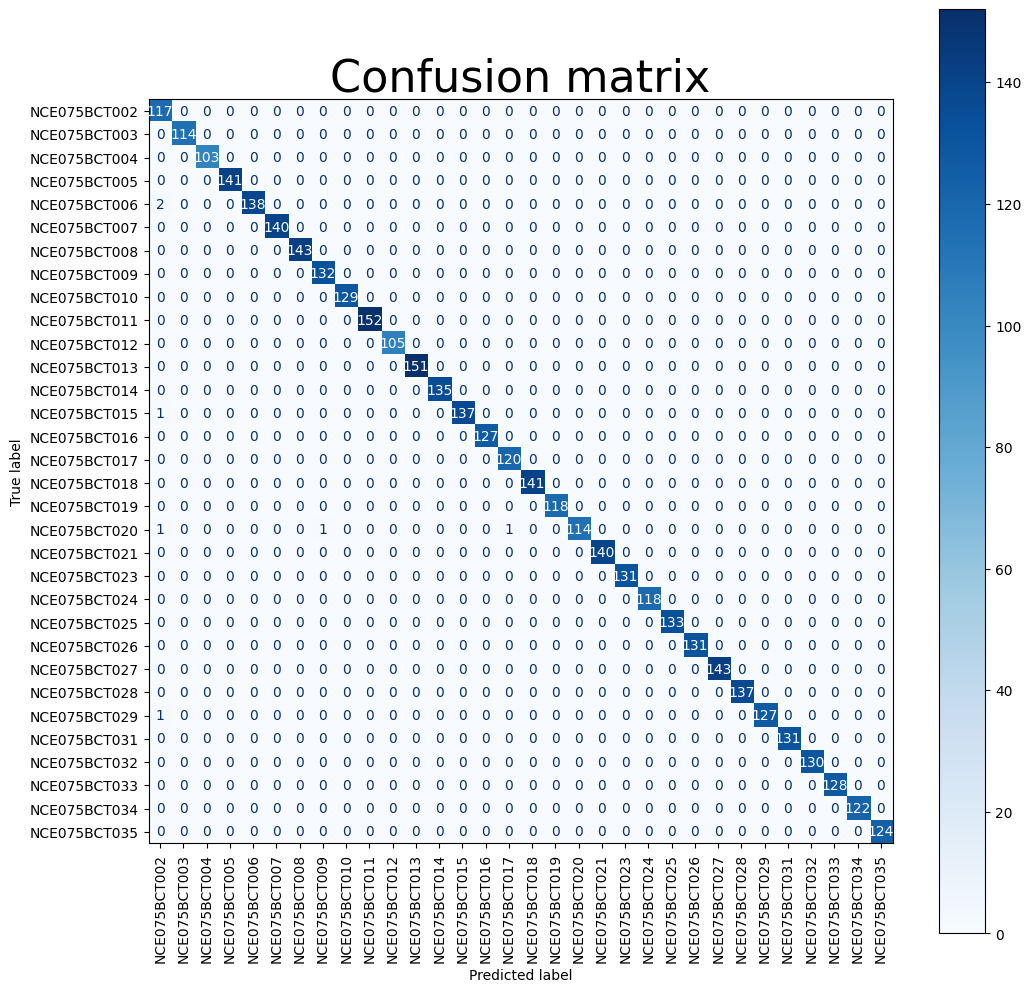

In [57]:
from sklearn.metrics import plot_confusion_matrix
title= "Confusion matrix"
fig, ax = plt.subplots(figsize=(12, 12))
disp = plot_confusion_matrix(model_svc, X_val_emb_nom, y_val,cmap=plt.cm.Blues,ax=ax)
plt.title(title,fontsize=32)
plt.xticks(rotation='vertical')
plt.show()

# RANDOM FOREST

In [58]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
randomforest=RandomForestClassifier(n_estimators=10)

In [59]:
#Train the model using the training sets y_pred=clf.predict(X_test)
randomforest.fit(X_train_emb_nom,y_train)

RandomForestClassifier(n_estimators=10)

In [60]:
#predict
y_preds_rf=randomforest.predict(X_val_emb_nom)

In [61]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_rf))

Accuracy: 0.9783601827362347


In [62]:
#precision 
print(precision_score(y_val, y_preds_rf, average='macro'))
print(precision_score(y_val, y_preds_rf, average='micro'))
print(precision_score(y_val, y_preds_rf, average='weighted'))

0.9783411394626412
0.9783601827362347
0.9787763256784613


In [63]:
print(recall_score(y_val, y_preds_rf, average='macro'))
print(recall_score(y_val, y_preds_rf, average='micro'))
print(recall_score(y_val, y_preds_rf, average='weighted'))

0.9787933943727511
0.9783601827362347
0.9783601827362347


In [64]:
print(f1_score(y_val, y_preds_rf, average='macro'))
print(f1_score(y_val, y_preds_rf, average='micro'))
print(f1_score(y_val, y_preds_rf, average='weighted'))

0.9783303492781323
0.9783601827362347
0.978336337995964


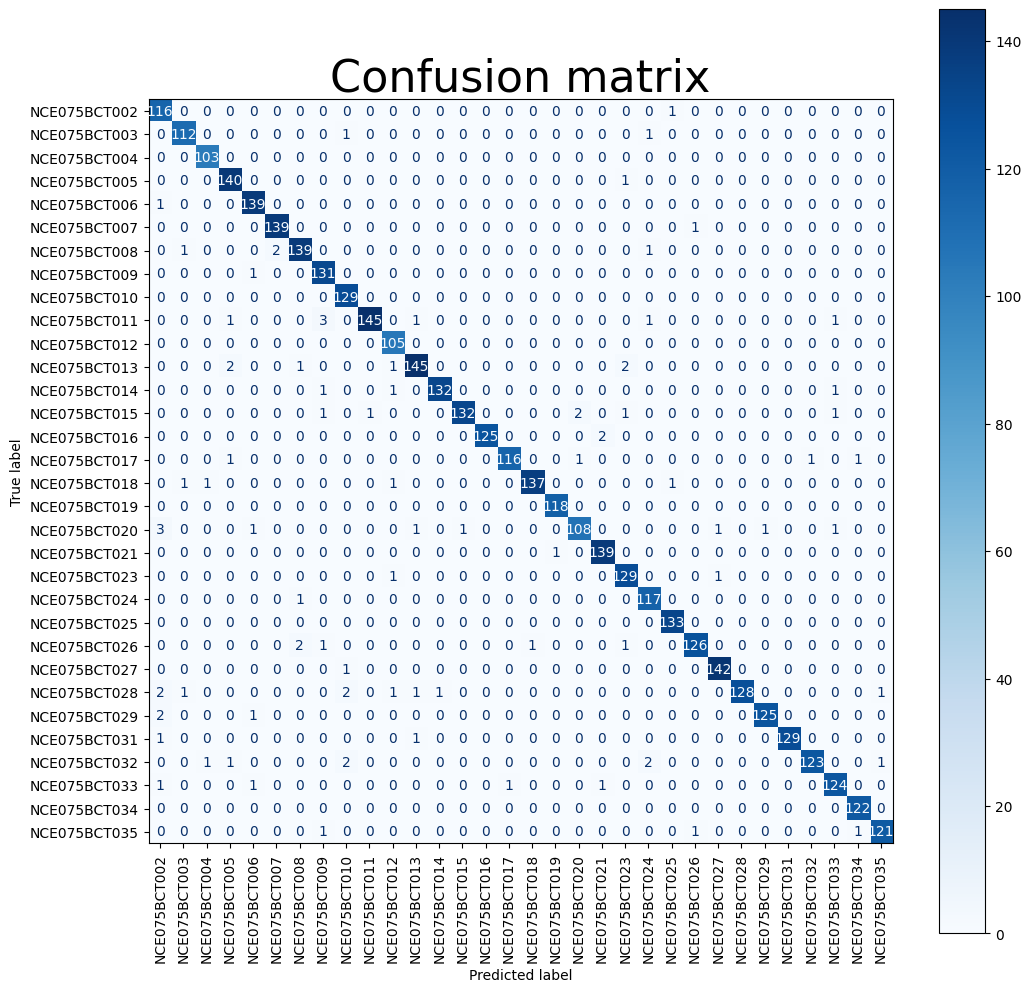

In [65]:
title= "Confusion matrix"
fig, ax = plt.subplots(figsize=(12, 12))
disp = plot_confusion_matrix(randomforest, X_val_emb_nom, y_val,cmap=plt.cm.Blues,ax=ax)
plt.title(title,fontsize=32)
plt.xticks(rotation='vertical')
plt.show()

# Knn algorithm

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knnNeigh = KNeighborsClassifier(n_neighbors=5)
knnNeigh.fit(X_train_emb_nom,y_train)

KNeighborsClassifier()

In [67]:
y_preds_knn=knnNeigh.predict(X_val_emb_nom)

In [68]:
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_knn))

Accuracy: 0.9867756672276989


In [69]:
#precision 
print(precision_score(y_val, y_preds_knn, average='macro'))
print(precision_score(y_val, y_preds_knn, average='micro'))
print(precision_score(y_val, y_preds_knn, average='weighted'))

0.9865866165348763
0.9867756672276989
0.9870615626244068


In [70]:
##recall
print(recall_score(y_val, y_preds_knn, average='macro'))
print(recall_score(y_val, y_preds_knn, average='micro'))
print(recall_score(y_val, y_preds_knn, average='weighted'))

0.9867148385625872
0.9867756672276989
0.9867756672276989


In [71]:
#f1 score
print(f1_score(y_val, y_preds_knn, average='macro'))
print(f1_score(y_val, y_preds_knn, average='micro'))
print(f1_score(y_val, y_preds_knn, average='weighted'))

0.9865061053367046
0.9867756672276989
0.986781238995985


# logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state=0,penalty='l2').fit(X_train_emb_nom,y_train)
y_preds_lr=logisticReg.predict(X_val_emb_nom)
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_lr))

Accuracy: 0.9622505409954316


In [73]:
#precision 
print(precision_score(y_val, y_preds_lr, average='macro'))
print(precision_score(y_val, y_preds_lr, average='micro'))
print(precision_score(y_val, y_preds_lr, average='weighted'))

0.9660887121878202
0.9622505409954316
0.9668530214710616


In [74]:
##recall
print(recall_score(y_val, y_preds_lr, average='macro'))
print(recall_score(y_val, y_preds_lr, average='micro'))
print(recall_score(y_val, y_preds_lr, average='weighted'))

0.9616925096420242
0.9622505409954316
0.9622505409954316


In [75]:
#f1 score
print(f1_score(y_val, y_preds_lr, average='macro'))
print(f1_score(y_val, y_preds_lr, average='micro'))
print(f1_score(y_val, y_preds_lr, average='weighted'))

0.9625668860141585
0.9622505409954316
0.9632691407492046


# Check on Sample Image

In [83]:
current_path = os.getcwd()
print("Current path:", current_path)

Current path: C:\Users\rozen\Desktop\Notebook_Scripts_Data1


In [84]:
image=process_image('face_1_1676267227.jpg')

In [85]:
image

<tf.Tensor: shape=(160, 160, 3), dtype=float32, numpy=
array([[[0.0884035 , 0.06879565, 0.05703095],
        [0.09224213, 0.07263429, 0.06086958],
        [0.0944631 , 0.07485525, 0.05916897],
        ...,
        [0.10721815, 0.0876103 , 0.07192402],
        [0.10582191, 0.08621407, 0.07052779],
        [0.09547738, 0.07586953, 0.06018326]],

       [[0.11776002, 0.09815218, 0.08488012],
        [0.11291024, 0.09330239, 0.08003033],
        [0.0992402 , 0.07963235, 0.06786764],
        ...,
        [0.10850873, 0.08890089, 0.07321461],
        [0.09436542, 0.07475758, 0.05907129],
        [0.13039368, 0.11078585, 0.09509958]],

       [[0.11879903, 0.09919119, 0.08742648],
        [0.13271102, 0.11310318, 0.10133848],
        [0.10827207, 0.08866422, 0.07689951],
        ...,
        [0.13013558, 0.11052774, 0.09484147],
        [0.13061588, 0.11100804, 0.09532177],
        [0.11899303, 0.09938519, 0.08369891]],

       ...,

       [[0.20441179, 0.14840688, 0.12738971],
        [0.12

In [86]:
image_1=tf.expand_dims(image, axis=0)

In [87]:
image_1

<tf.Tensor: shape=(1, 160, 160, 3), dtype=float32, numpy=
array([[[[0.0884035 , 0.06879565, 0.05703095],
         [0.09224213, 0.07263429, 0.06086958],
         [0.0944631 , 0.07485525, 0.05916897],
         ...,
         [0.10721815, 0.0876103 , 0.07192402],
         [0.10582191, 0.08621407, 0.07052779],
         [0.09547738, 0.07586953, 0.06018326]],

        [[0.11776002, 0.09815218, 0.08488012],
         [0.11291024, 0.09330239, 0.08003033],
         [0.0992402 , 0.07963235, 0.06786764],
         ...,
         [0.10850873, 0.08890089, 0.07321461],
         [0.09436542, 0.07475758, 0.05907129],
         [0.13039368, 0.11078585, 0.09509958]],

        [[0.11879903, 0.09919119, 0.08742648],
         [0.13271102, 0.11310318, 0.10133848],
         [0.10827207, 0.08866422, 0.07689951],
         ...,
         [0.13013558, 0.11052774, 0.09484147],
         [0.13061588, 0.11100804, 0.09532177],
         [0.11899303, 0.09938519, 0.08369891]],

        ...,

        [[0.20441179, 0.14840688, 

In [88]:
image_data=model.predict(image_1)

In [89]:
image_data

array([[-0.17820838, -1.9261945 ,  0.3867932 ,  0.7874871 , -0.34702086,
         0.4329523 ,  0.22366472, -1.1182083 , -0.7108475 ,  1.6734965 ,
        -0.26062194, -0.69925225, -0.30578122, -0.060811  , -0.5897461 ,
         0.25944608,  2.1418464 , -1.9586422 ,  0.9052515 ,  0.62014794,
        -0.0820196 , -0.7317759 ,  0.37349832,  0.114658  ,  1.05558   ,
         0.26636666,  0.20918639,  2.0484147 ,  0.38763833, -0.86819696,
         0.41436967, -0.8619496 ,  0.8397409 , -0.9947391 , -0.1551773 ,
         1.9102695 , -2.1361432 ,  0.3068444 ,  0.41062883, -1.0909269 ,
        -1.4146556 ,  1.1000161 , -0.9400383 , -0.37182757,  1.9154571 ,
         0.28873822, -1.4906745 ,  2.7804596 , -1.5850129 ,  0.65888524,
        -0.09302951,  1.8757763 , -0.44677565, -0.32285416,  0.00336304,
         1.4299014 ,  0.09903568, -0.31563264,  1.5908766 ,  0.06902968,
         0.32324365,  0.58559394,  1.5950896 ,  0.24760585, -0.5821562 ,
         1.1820989 ,  0.41932613,  0.983605  ,  0.4

In [90]:
in_encode = Normalizer(norm='l2')
image_nom = in_encode.transform(image_data)

In [91]:
raw_predict=model_svc.predict_proba(image_nom)
percent=raw_predict[0]*100
percent.astype(int)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 94,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [92]:
if raw_predict.max()>0.2:
    result=model_svc.predict(image_nom)
else:
    result="no"

In [93]:
result

array(['NCE075BCT020'], dtype='<U12')

In [94]:
randomforest.predict(image_nom)

array(['NCE075BCT020'], dtype='<U12')

In [95]:
randomforest.predict_proba(image_nom)

array([[0.1, 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0.1, 0. , 0. , 0. , 0. , 0.4, 0. , 0.1, 0. , 0. , 0. , 0. , 0. ,
        0.1, 0. , 0.1, 0. , 0. , 0. ]])

In [96]:
import datetime
pickle.dump(model_svc,open("model/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+"_svc.pk","wb"))